# Introduction to Sound Processing.

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

sample_rate = 44100

# Loading a sound.

In [2]:
samples, _ = librosa.core.load("banjo_A3_very-long_forte_normal.mp3", sample_rate)

# Inspecting data.

In [3]:
print(np.min(samples))
print(np.mean(samples))
print(np.max(samples))
print(samples[1000:1200])

-0.50823975
-1.5376703e-07
0.40637207
[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 -3.0517578e-05
  0.0000000e+00  3.0517578e-05  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -3.0517578e-05  3.0517578e-05
  3.0517578e-05 -6.1035156e-05  3.0517578e-05  3.0517578e-05
 -6.1035156e-05  3.0517578e-05  0.0000000e+00  0.0000000e+00
 -3.0517578e-05  3.0517578e-05 -3.0517578e-05  6.1035156e-05
 -6.1035156e-05  0.0000000e+00  6.1035156e-05 -3.0517578e-05
  0.0000000e+00 -3.0517578e-05  3.0517578e-05  0.0000000e+00
 -3.0517578e-05  0.0000000e+00  3.0517578e-05 -3.0517578e-05
  3.0517578e-05  0.0000000e+00 -3.0517578e-05  0.0000000e+00
  3.0517578e-05 -3.0517578e-05  3.0517578e-05 -3.0517578e-05
  0.0000000e+00  0.0000000e+00 -3.0517578e-05  6.1035156e-05
 -9.1552734e-05  6.1035156e-05  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -6.1035156e-05  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  3.0517578e-05 -

# Plotting the data.

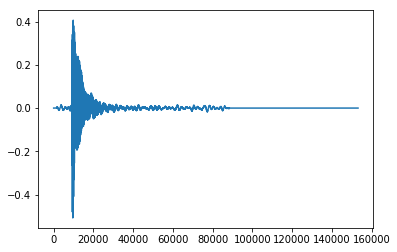

In [4]:
plt.plot(samples)

# Playing a sound.

In [6]:
def play_samples(samples):
    p = pyaudio.PyAudio()
    stream = p.open(rate=sample_rate, format=pyaudio.paFloat32, channels=1, output=True)

    stream.write(samples.tobytes())

    stream.close() 
    p.terminate()
    
play_samples(samples)

# Mixing two samples.

In [7]:
samples1, _ = librosa.core.load("banjo_A3_very-long_forte_normal.mp3", sample_rate)
samples2, _ = librosa.core.load("banjo_C3_very-long_forte_normal.mp3", sample_rate)
min_length = min(len(samples1), len(samples2))
samples_mixed = (samples1[:min_length] + samples2[:min_length]) / 2.0

play_samples(samples1)
play_samples(samples2)
play_samples(samples_mixed)

# Feature Extraction: Fourier transform.

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


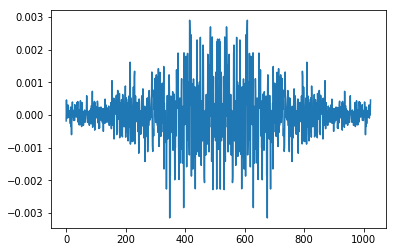

In [8]:
samples, _ = librosa.core.load("banjo_A3_very-long_forte_normal.mp3", sample_rate)
samples = samples[3*sample_rate:3*sample_rate + 1024]
samples_fft = np.fft.fft(samples)
plt.plot(samples_fft)

# Feature Extraction: Mel-Spectrogram.

(128, 320)


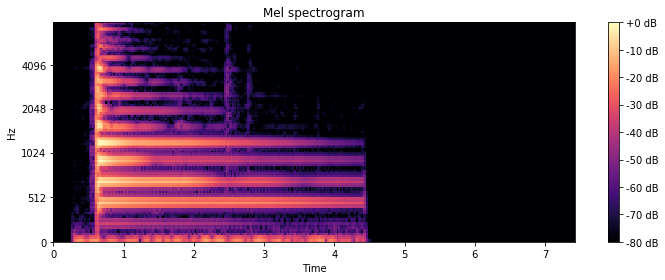

In [10]:
def render_mel(mel):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel,
                                                 ref=np.max),
                             y_axis='mel', fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()


samples, _ = librosa.core.load("banjo_C3_very-long_forte_normal.mp3", sample_rate)
samples = samples[0 * sample_rate:4 * sample_rate]
mel = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=2000)
render_mel(mel)
print(mel.shape)

# How does coffee-making look and sound like?

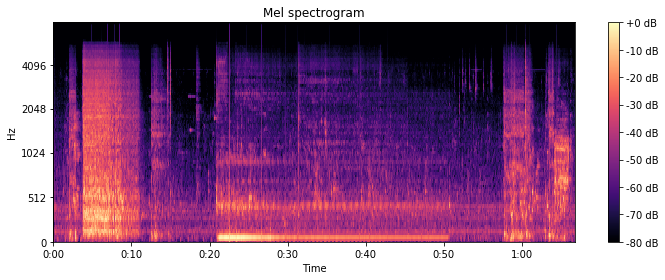

In [12]:
samples, _ = librosa.core.load("Kaffe Creme.wav", sample_rate)

mel = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
render_mel(mel)
play_samples(samples)

# And what about cappuccino?

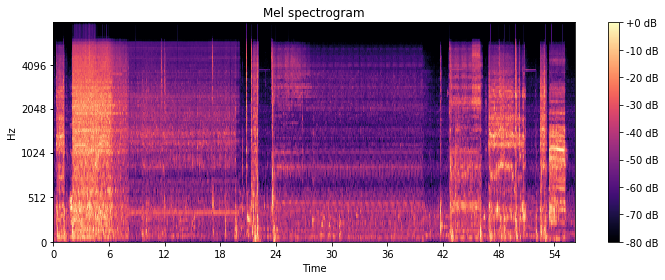

In [13]:
samples, _ = librosa.core.load("Cappuccino.wav", sample_rate)

mel = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
render_mel(mel)
play_samples(samples)

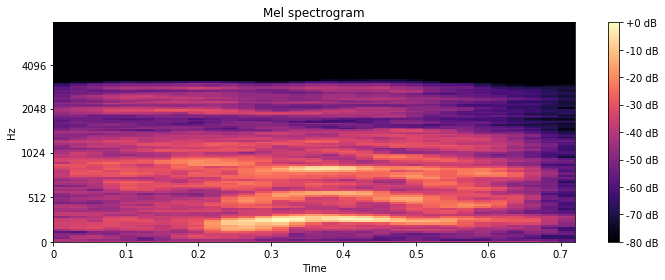

In [19]:
samples, _ = librosa.core.load("jump.wav", sample_rate)

samples = librosa.effects.pitch_shift(samples, sample_rate, n_steps=1.0)

mel = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
render_mel(mel)
play_samples(samples)